In [15]:
include("MyPyPlots.jl")
include("AuxFunctions.jl")
include("Hamiltonians.jl")
import .MyPyPlots
import .AuxFunctions
import .Hamiltonians

using DelimitedFiles
using LinearAlgebra

# Import sites and vectors

In [16]:
sites_path = "sites.txt"

dCC = 1.42028 #angstrom
uc = readdlm(sites_path, skipstart=1) #angstrom
a1 = [102.2602844238,         0.0000000000,         0.0000000000] #angstrom
a2 = [0.0000000000,         2.4599997997,         0.0000000000] #angstrom

MyPyPlots.structures2D(uc,vecs=[a1,a2],sitelabels=false,markersize=2)

# Find neighbors

In [17]:
neighbors_uc,neighbors_n1n2 = AuxFunctions.neighbors_honeycomb_2DBloch(uc,a1,a2,dNN=dCC,tol=1e-5*dCC);

MyPyPlots.structures2D(uc,neighbors=neighbors_uc,linecolors=["blue"],markersize=2,linewidth=0.2)

# Hamiltonian

In [18]:
t1 = -2.7 #eV

H2D(phi1,phi2) = Hamiltonians.TB_Bloch2D(phi1,phi2,neighbors_uc,neighbors_n1n2,hoppings=[t1])

H2D (generic function with 1 method)

In [19]:
ktest = [1.2,0.7,0] #Angstrom^(-1)

phi1 = dot(ktest,a1)
phi2 = dot(ktest,a2)

H2D(phi1,phi2)

96×96 SparseArrays.SparseMatrixCSC{ComplexF64, Int64} with 192 stored entries:
⎡⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠦⡀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⎤
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⢢⡀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠢⡀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠉⠢⡀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⡀⠀⠀⠀⠀⠀⠀⠀⠘⠢⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⎥
⎢⠢⡄⠀⠀⠀⠀⠀⠀⠀⠈⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠈⠢⣀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠈⠢⡀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠈⠣⡀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠈⠲⡀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎣⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎦

In [20]:
ishermitian(H2D(phi1,phi2))

true

# Bands 3D

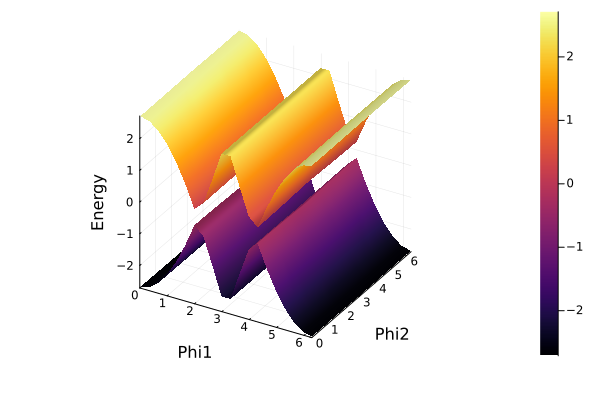

In [9]:
using Plots

# Define the function H2D
function E2D(phi1, phi2, band)
    E,psi = eigen(Matrix(H2D(phi1,phi2)))
    return E[band]
end

# Generate phi1 and phi2 values
phi1_values = LinRange(0, 2π, 20)
phi2_values = LinRange(0, 2π, 20)

# Create a grid of phi1 and phi2 values
phi1_grid = repeat(phi1_values, 1, length(phi2_values))
phi2_grid = repeat(phi2_values', length(phi1_values), 1)

# Calculate H2D values for each combination of phi1 and phi2
E2D_values = [E2D.(phi1_grid, phi2_grid, band) for band in 48:49]

plot(phi1_values, phi2_values, E2D_values[1], st=:surface, xlabel="Phi1", ylabel="Phi2", zlabel="Energy")
plot!(phi1_values, phi2_values, E2D_values[2], st=:surface, xlabel="Phi1", ylabel="Phi2", zlabel="Energy")

┌ Warning: Multiple series with different color share a colorbar.
│ Colorbar may not reflect all series correctly.
└ @ Plots /home/anooja/.julia/packages/Plots/HyyIK/src/backends/gr.jl:528
┌ Warning: Multiple series with different color share a colorbar.
│ Colorbar may not reflect all series correctly.
└ @ Plots /home/anooja/.julia/packages/Plots/HyyIK/src/backends/gr.jl:528
┌ Warning: Multiple series with different color share a colorbar.
│ Colorbar may not reflect all series correctly.
└ @ Plots /home/anooja/.julia/packages/Plots/HyyIK/src/backends/gr.jl:528


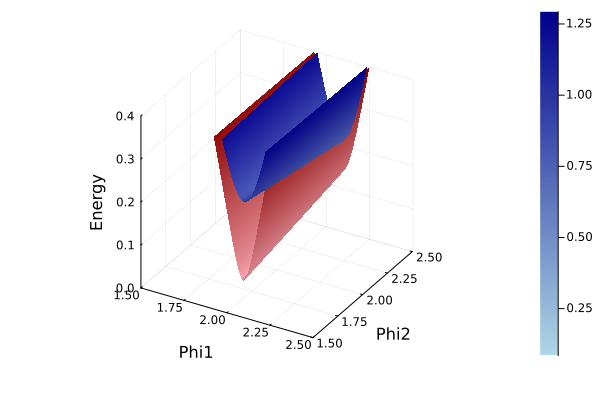

In [30]:
using Plots

# Define the function H2D
function E2D(phi1, phi2, band)
    E,psi = eigen(Matrix(H2D(phi1,phi2)))
    return E[band]
end

# Generate phi1 and phi2 values
phi1_values = LinRange(1.5, 2.5, 100)
phi2_values = LinRange(1.5, 2.5, 100)

# Create a grid of phi1 and phi2 values
phi1_grid = repeat(phi1_values, 1, length(phi2_values))
phi2_grid = repeat(phi2_values', length(phi1_values), 1)

# Calculate H2D values for each combination of phi1 and phi2
E2D_values = [E2D.(phi1_grid, phi2_grid, band) for band in 49:50]

plot(phi1_values, phi2_values, E2D_values[1], st=:surface, xlabel="Phi1", ylabel="Phi2", zlabel="Energy",zlims=(0,0.4), color=:red, colormap=:reds)
# plot!(phi1_values, phi2_values, E2D_values[2], st=:surface, xlabel="Phi1", ylabel="Phi2", zlabel="Energy",zlims=(0,0.4), color=:blue, colormap=:blues)

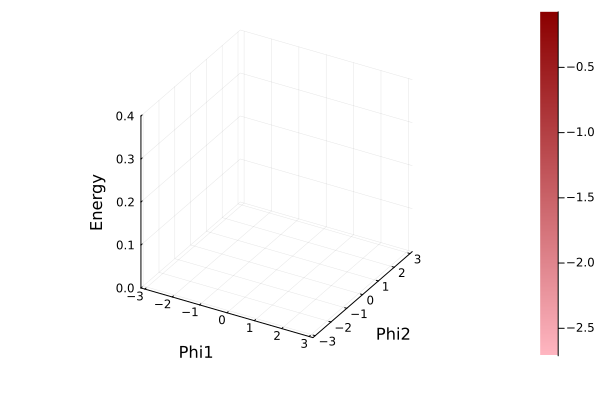

In [34]:
plot(phi1_values, phi2_values, E2D_values[1], st=:surface, xlabel="Phi1", ylabel="Phi2", zlabel="Energy",zlims=(0,0.4), color=:red, colormap=:reds)
# plot!(phi1_values, phi2_values, E2D_values[2], st=:surface, xlabel="Phi1", ylabel="Phi2", zlabel="Energy",zlims=(0,0.4), color=:blue, colormap=:blues)

In [38]:
minimum(-E2D_values[1])

-3.820603302372788e-16

In [39]:
minimum(E2D_values[2])

-2.122417480012901e-16

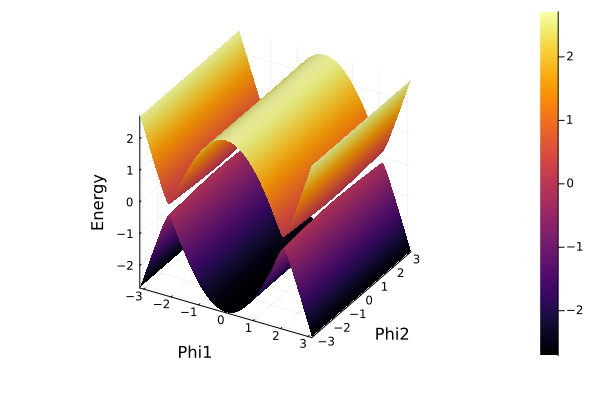

In [32]:
using Plots

# Define the function H2D
function E2D(phi1, phi2, band)
    E,psi = eigen(Matrix(H2D(phi1,phi2)))
    return E[band]
end

# Generate phi1 and phi2 values
phi1_values = LinRange(-π, π, 100)
phi2_values = LinRange(-π, π, 100)

# Create a grid of phi1 and phi2 values
phi1_grid = repeat(phi1_values, 1, length(phi2_values))
phi2_grid = repeat(phi2_values', length(phi1_values), 1)

# Calculate H2D values for each combination of phi1 and phi2
E2D_values = [E2D.(phi1_grid, phi2_grid, band) for band in 48:49]

plot(phi1_values, phi2_values, E2D_values[1], st=:surface, xlabel="Phi1", ylabel="Phi2", zlabel="Energy")
plot!(phi1_values, phi2_values, E2D_values[2], st=:surface, xlabel="Phi1", ylabel="Phi2", zlabel="Energy")

In [33]:
minimum(-E2D_values[1])

0.07388007107347949

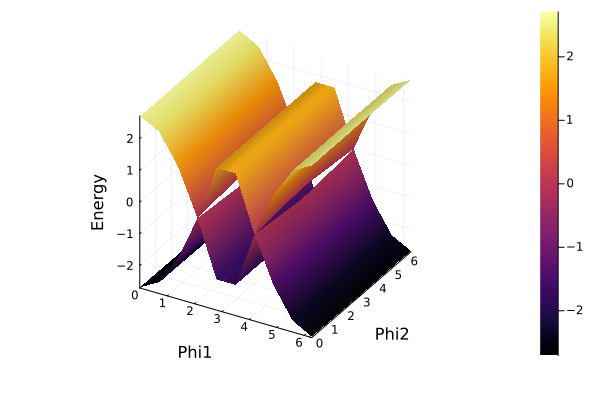

In [43]:
using Plots

# Define the function H2D
function E2D(phi1, phi2, band)
    E,psi = eigen(Matrix(H2D(phi1,phi2)))
    return E[band]
end

# Generate phi1 and phi2 values
phi1_values = LinRange(0, 2π, 10)
phi2_values = LinRange(0, 2π, 10)

# Create a grid of phi1 and phi2 values
phi1_grid = repeat(phi1_values, 1, length(phi2_values))
phi2_grid = repeat(phi2_values', length(phi1_values), 1)

# Calculate H2D values for each combination of phi1 and phi2
E2D_values = [E2D.(phi1_grid, phi2_grid, band) for band in 48:49]

plot(phi1_values, phi2_values, E2D_values[1], st=:surface, xlabel="Phi1", ylabel="Phi2", zlabel="Energy")
plot!(phi1_values, phi2_values, E2D_values[2], st=:surface, xlabel="Phi1", ylabel="Phi2", zlabel="Energy")